# Hidden Markov Model (HMM)
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
np.random.seed(42)
n_days = 252
prices = np.array([100])

for _ in range(n_days - 1):
    change = np.random.normal(0.001, 0.02)
    prices = np.append(prices, prices[-1] * (1 + change))

returns = np.diff(np.log(prices))
X_hmm = returns.reshape(-1, 1)

print(f'Number of days: {len(prices)}')
print(f'Price range: ${prices.min():.2f} - ${prices.max():.2f}')

Number of days: 252
Price range: $82.18 - $126.25


In [3]:
model = hmm.GaussianHMM(n_components=2, covariance_type='diag', n_iter=1000, random_state=42)
model.fit(X_hmm)

hidden_states = model.predict(X_hmm)

print(f'Converged: {model.monitor_.converged}')
print(f'Number of hidden states: {model.n_components}')
print(f'\nTransition Matrix:')
print(model.transmat_)
print(f'\nMeans:')
for i, mean in enumerate(model.means_):
    print(f'State {i}: {mean[0]:.6f}')

Converged: True
Number of hidden states: 2

Transition Matrix:
[[9.78857616e-01 2.11423840e-02]
 [9.99943563e-01 5.64369263e-05]]

Means:
State 0: 0.000284
State 1: 0.018783


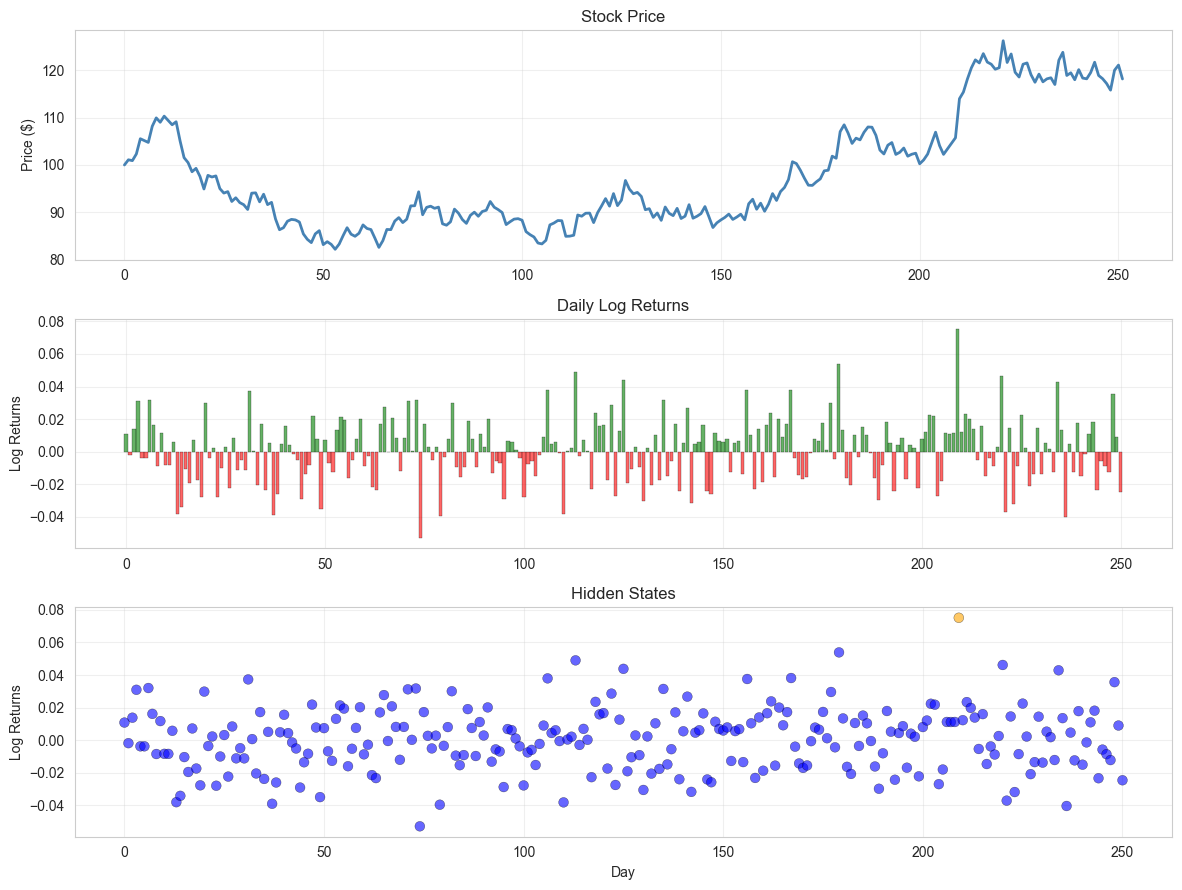

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

axes[0].plot(prices, linewidth=2, color='steelblue')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Stock Price')
axes[0].grid(alpha=0.3)

colors_bar = ['green' if r > 0 else 'red' for r in returns]
axes[1].bar(range(len(returns)), returns, color=colors_bar, alpha=0.6, edgecolor='black', linewidth=0.3)
axes[1].set_ylabel('Log Returns')
axes[1].set_title('Daily Log Returns')
axes[1].grid(alpha=0.3)

colors_state = ['blue' if state == 0 else 'orange' for state in hidden_states]
axes[2].scatter(range(len(hidden_states)), returns, c=colors_state, s=50, alpha=0.6, edgecolors='black', linewidth=0.3)
axes[2].set_ylabel('Log Returns')
axes[2].set_xlabel('Day')
axes[2].set_title('Hidden States')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()